__Created By:__ Bailey Stephens <br>
__Continued By:__ Caitlin O'Brien <br>
__Creation Date:__ 3/20/2022 <br>
__Last Edited:__ 3/29/2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
from astropy import units as u

### Integrals Using a Reiman Sum
When calculating an integral given a function, it is a straight-forward process. However, if you only have a set of discrete data points, then it is not clear what function you should integrate over. There is an alternative to typical integration called a "Reiman Sum." Imagine creating a small box for each data point where the width of the box is the distance between points and the height represents the y-value of that same point. The area of all these boxes can then be summed in order to approximate the area underneath a function (or data points in this case). While this method of integration is slightly inaccurate, it becomes more accurate with a larger number of data points.

### 1. Finding Equivalent Width
We have access to solar spectrum data (flux as a function of wavelength), so we can plot it on the following graph:

Text(0, 0.5, 'Flux')

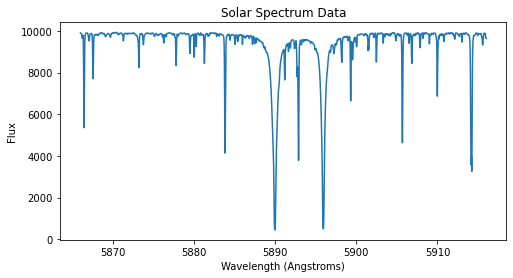

In [2]:
### Loads solar data into variable
spec = astropy.io.ascii.read("solar_spectrum.txt")

### Plots solar data
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(spec["col1"], spec["col2"])
plt.title("Solar Spectrum Data")
plt.xlabel("Wavelength (Angstroms)")
plt.ylabel("Flux")

Since we are only looking at the solar sodium (Na) doublet lines, we can limit the plotted wavelengths. Additionally, we can normalize the flux to prepare our data for calculating the equivalent width. We will plot two red lines to visually show the beginning and end of "continuous emissions? idk i still don't really understand these red lines." (FIXME)

Text(0, 0.5, 'Normalized Flux')

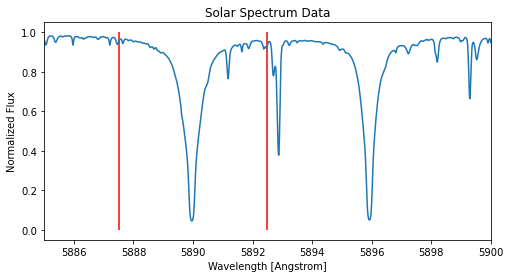

In [3]:
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(spec["col1"], spec["col2"] / 1e4)
plt.vlines(5887.5, 0, 1, color="red")
plt.vlines(5892.5, 0, 1, color="red")
plt.xlim(5885, 5900)
plt.title("Solar Spectrum Data")
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

The equivalent width of sodium 5890 can be found by calculating the area between the data and y=1. We will use a Reiman sum for this process, and this is depicted below.

Calculated Equivalent Width (EW): 0.8346720000182191


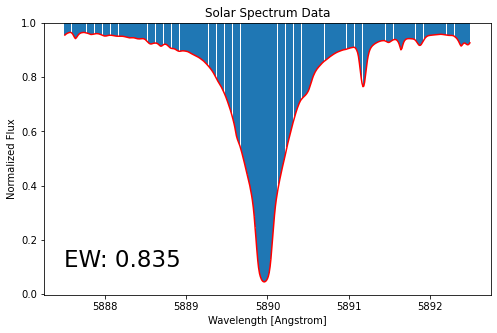

In [4]:
min_w=5887.5    ### Minimum wavelength
max_w=5892.5    ### Maximum wavelength

### Calculates indices of data within specified wavelength range
ind = np.where((spec["col1"] < max_w) & (spec["col1"] > min_w))

### Finds the median distance between points (width of rectangles)
inc = np.median(np.diff(spec["col1"][ind]))

### Calculates Reiman Sum (equivalent width)
ew = np.sum(1e4 - spec["col2"][ind]) * inc / 1e4

### Finds the x- and y-values for the specified range
xvals = [wavelength for wavelength in spec['col1'] if wavelength > min_w if wavelength < max_w]
yvals=[flux/1e4-1 for flux in spec['col2'][ind]]

### Sets figure dimensions
plt.rcParams["figure.figsize"] = (8,5)

### Plots a bar graph representing the Remian Sum over original data
plt.bar(xvals, yvals, width=inc, bottom=1)
plt.plot(xvals, [1+val for val in yvals], color='red')

### Prints equivalent width on the plot
plt.text(min_w, 0.1, 'EW: ' + str(round(ew, 3)), fontsize = 23)

### Adds labels to the plot
plt.title("Solar Spectrum Data")
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

print("Calculated Equivalent Width (EW):", ew)

### 2a. Number Density of Ground State Na Atoms
A [curve of growth](http://spiff.rit.edu/classes/phys440/lectures/curve/curve.html) is a depiction of the equivalent width as a function of the number of absorbing atoms. We are given the below curve of growth for the Sun
<br> <br> <br>
<div>
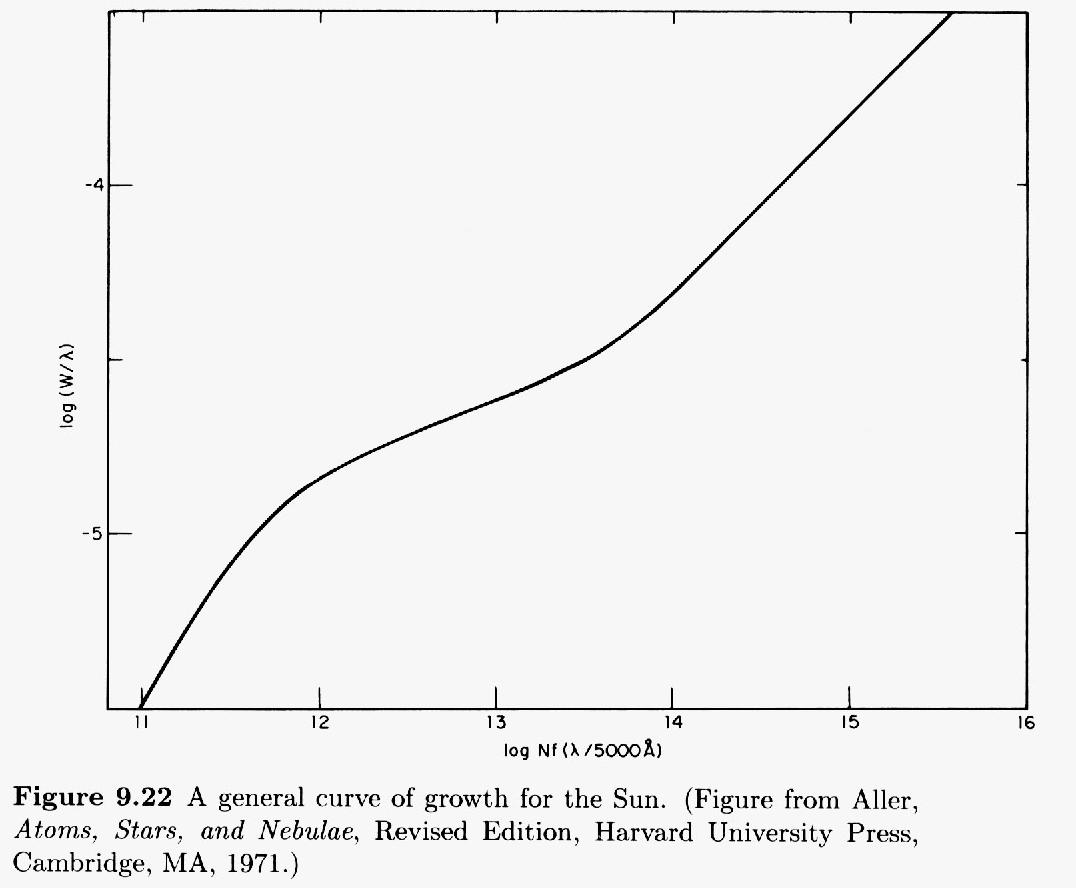
</div>
<br><br>
Above we found the equivalent width (EW = 0.835) for at a specific frequency ($\lambda$ = 5890 Angstroms), so we can derive what the x-value should be on this graph. The red lines below mark this equivalent width and the associated x-axis value.

<div>
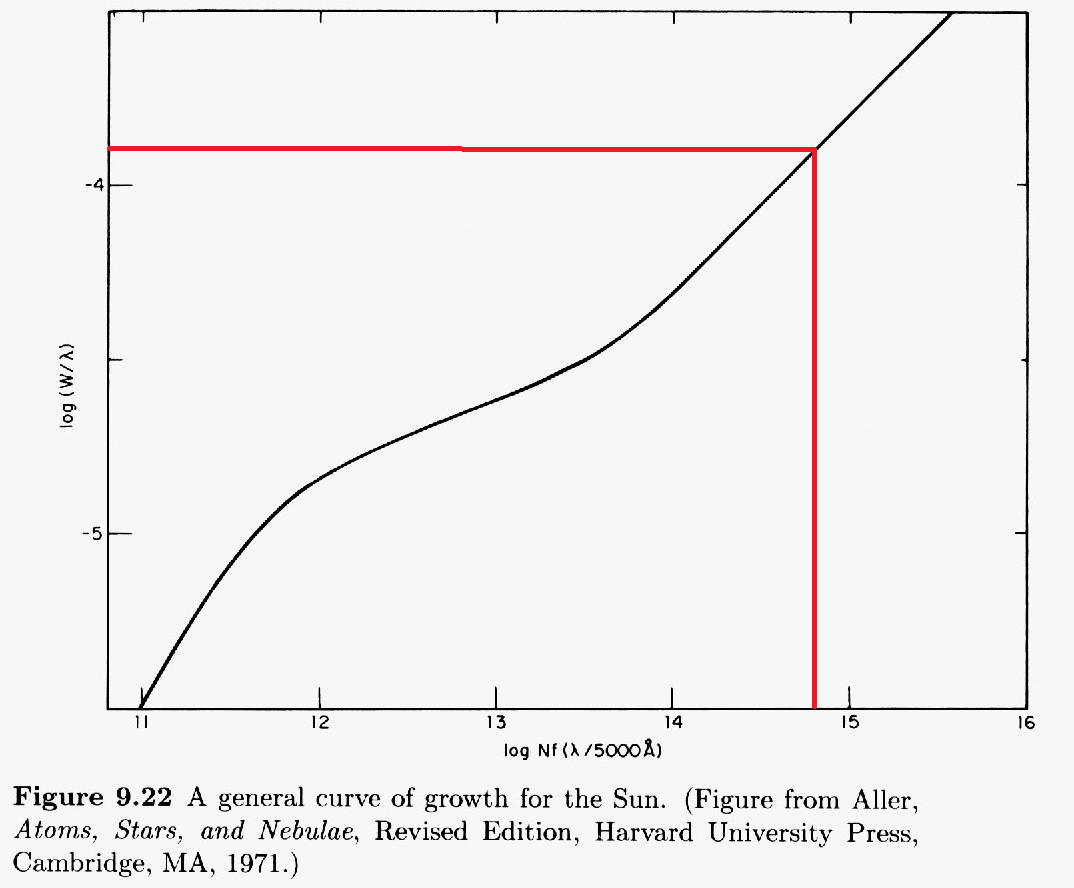
</div>
<br><br>
Hence, we see that
$$
\begin{align*}
14.8 \approx \log \left( N f\left( \frac{\lambda}{5000 \mathring{A}} \right) \right)\\\\
\end{align*}
$$
Using the wavelength of interest ($\lambda$ = 5890 Angstroms) and oscillator strength $f$ = 0.65 ($f$ relates to how likely a transition is to occur), we have that <br><br>
$$
\begin{align*}
N &\approx 10^{14.8} \frac{5000 \mathring{A}}{f \lambda} \\\\
&= 10^{14.8} \frac{5000 \mathring{A}}{(0.65) (5890 \mathring{A})} \\\\
&= 8.24*10^{14} \text{ particles}\\\\
\end{align*}
$$
Meaning that given these conditions, there are $8.24*10^{14}$ absorbing (ground state) particles. This calculation is provided in the below cell.

In [5]:
### Function with one return value
def N1(f, wavelength):
    """
    Calculates the number density of absorbing sodium atoms
    
    Parameters:
    f: oscillator strength for transition
    wavelength: wavelength being considered on spectrum
    
    Outputs:
    N1: number density of absorbing sodium atoms
    """
    
    return 10**14.8 * (5000/(f*wavelength))

print("N1:", "{:e}".format(N1(0.65, 5890)))

N1: 8.240268e+14


In [6]:
Na_ground = N1(0.65, 5890)

### 2b. Boltzmann Equation
We now look to use the Boltzmann equation to derive the ratio of sodium atoms in the ground state to sodium atoms in excited states. The Boltzmann equation is given by
$$
\begin{align*}
\frac{N_2}{N_1} = \frac{g_2}{g_1} e^{-(E_2 - E_1) / k T} \\\\
\end{align*}
$$
where $g_n$ is the number degenerate states for a given quantum number $n$, $E_n$ is the energy associated with that same number $n$, $k$ is the Boltzmann constant, and $T$ is the temperature (surface temperature of the Sun in this case). For simple systems, we know that $g_n = 2 n^2$, so we can easily calculate $g_1$ and $g_2$ (NOTE: subscripts of 1 refer to the 3s state and 2 refers to the 3p state). The energies associated with these states are given in the [following graph](http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/sodium.html#c1):
<br><br>
<div>
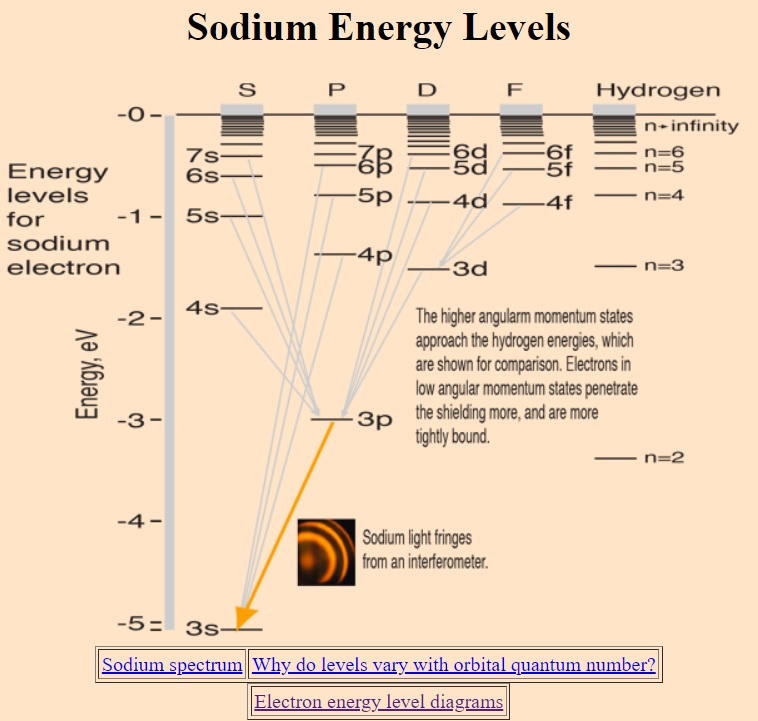
</div>
<br>
We can see that $E_1 = E_{3s} \approx -5.14$ eV and $E_1 = E_{3p} \approx -3.04$ eV. These values are confirmed in Dr. Wang's lecture slides (Week 4: Stars and Stellar Composition). We now have all the components needed to utilize the Boltzmann equation, and we calculate it in the follow code block.

In [7]:
### Function with one return value
def g(n):
    """
    Calculates the number of degenerate states at a given energy
    level. This only holds for simple systems.
    
    Parameters:
    n: quantum number associated with energy level
    
    Output:
    g: number of degenerate energy states associated with the given n
    """
    
    return 2*n**2

### Function with one return value
def boltzmannEqn():
    """
    Calculates the ratio of sodium atoms in the ground state to
    sodium atoms in excited states.
    
    Parameters: None
    
    Output:
    Ratio of sodium atoms in the ground state to sodium atoms in 
    excited states.
    """
    
    pEnergy=-3.04 * u.eV       ### Energy of 3p sodium state
    sEnergy=-5.14 * u.eV       ### Energy of 3s sodium state
    k=8.617e-5 * u.eV / u.K    ### Boltzmann constant
    T=5778 * u.K               ### Surface temperature of the Sun
    
    return (g(2)/g(1) * np.exp(-(pEnergy-sEnergy)/(k*T))).decompose()

print("N2/N1:", boltzmannEqn())

N2/N1: 0.05892425057158877


### 3. Saha Equation
Another useful formula is the Saha equation, which estimates the ratio of neutral sodium atoms to ionized sodium atoms. The Saha equation is given by <br><br>
$$
\begin{align*}
\frac{Na_{II}}{Na_{I}} = \frac{2kT}{P_e} \frac{Z_{II}}{Z_I} \left(\frac{2\pi m_e kT}{h^2}\right)^{3/2} \exp{\left(-\frac{\chi}{kT}\right)}
\end{align*}
$$
<br><br>
where $K$ is the Boltzmann constant, $T$ is the temperature (surface temperature of the Sun for us), $P_e$ is the electron pressure, $Z_{I}$ and $Z_{II}$ are partition functions, $m_e$ is the mass of an electron, $h$ is Plank's constant, and $\chi$ is the ionization energy. For our sodium atom, we are given several of these values by Dr. Wang:
<br>
$$
\begin{align*}
Z_I &= 2.4 \\
Z_{II} &= 1.0 \\
P_e &= 1.0 \text{ N m}^{-2} \\
\chi &= 5.1 \text{ eV}
\end{align*}
$$
<br>
This means that we know the value of each constant in the Saha equation and can calculate it below.

In [8]:
def sahaEqn():
    """
    Calculates the ratio of neutral sodium atoms to ionized sodium atoms
    
    Parameters: None
    
    Output:
    Ratio of neutral sodium atoms to ionized sodium atoms
    """
    
    Pe=1.0 * u.N / u.m**2     ### Electron pressure
    ZI=2.4                    ### Partition function
    ZII=1.0                   ### Partition function
    chi=5.1 * u.eV            ### Ionization energy
    T=5778 * u.K              ### Surface temperature of Sun
    k=8.617e-5 * u.eV / u.K   ### Boltmann constant
    me=9.11e-31 * u.kg        ### Mass of an electron
    h=4.136e-15 *u.eV * u.s   ### Plank's constant
    
    return ((2*k*T/Pe) * (ZII/ZI) * (2*np.pi*me*k*T/h**2)**(3/2) * np.exp(-chi/(k*T))).decompose()

print("NaII/NaI:", sahaEqn())

NaII/NaI: 2509.163867028137


### 4. Putting It All Together
We are now able to calculate the total number of sodium atoms in the Sun's photosphere. In is provided that this quantity is represented by <br><br>
$$
\begin{align*}
(\text{# of sodium atoms}) = N_{1} \times \left(1+\frac{N_2}{N_1} \right) \times \left(1+\frac{Na_{II}}{Na_{I}}\right)
\end{align*}
$$
<br><br>
Notice how we have calculated all these values! $N_{1}=8.24*10^{14}$ atoms (from __Number Density of Ground State Na Atoms__), $\frac{N_2}{N_1} = 0.059$ (from __Boltzmann Equation__), and $\frac{Na_{II}}{Na_{I}}=2509.164$ (from __Saha Equation__). Hence, we can calculate this quantity in the next code block.

In [9]:
### Function with no return value
def columnDensity():
    """
    Calculates the column density using above functions
    
    Parameters: None
    
    Outputs: None
    """
    
    print("Column Density:", N1(0.65, 5890) * (1+boltzmannEqn()) * (1+sahaEqn()))

columnDensity()

Column Density: 2.1903237934745065e+18


### 5. Ratio of Sodium to Hydrogen
We have now computed the __Total Column Density__ of sodium atoms in the sun's photosphere based on the ratio of sodium atoms in the ground state to sodium atoms in the excited state and the ratio of neutral sodium atoms to ionized sodium atoms.

Next, given the __Column Density__ of Hydrogen atoms to be about $6.6*10^{23}$, we now want to find the abundance of sodium relative to hydrogen in both physicists' and astronomers' terminology.

According to Dr. Wang, N as in N1/N2 or NI/NII can be either __Column Density__ or __Number Density__ since the ratio is unitless. __Number Density__ measures the concentration of a substance per unit volume, in this case atoms per $cm^{2}$. So, if we take the ratio of __Column Density of Na__ to the __Column Density of H__ we will find the ratio of abundances.

We need to do this in both physicists' and astronomers' terminology.

In [10]:
# First, we calculate our values for our sodium calculation.
NI = N1(0.65, 5890) # number density of ground state Na atoms
NII = NI * boltzmannEqn() # number density of excited state Na atoms
NaI = NI + NII # number density of neutral state Na atoms
NaII = NaI * 2517 # number density of ionized Na atoms
# NaII multiplied by the number Ji gave in his Example code
Na_total = NI + NII + NaII

# Then, we assign the given Hydrogen column density to a variable.
H_total = 6.6e23

In physicists' terminology, we consider the mole ratio between Na and H, also written as N<sub>Na</sub> / N<sub>H</sub>. Above, we have defined N<sub>Na</sub> and N<sub>H</sub>. So we can find the mole ratio in physicists' terminology by performing the following calculation.

In [11]:
ratio_ph = (Na_total / H_total)
print("In physicists' terminology, mole ratio between Na and H is",ratio_ph)

In physicists' terminology, mole ratio between Na and H is 3.3290325181997408e-06


In astronomers' terminology (assuming we are working with galaxies), we consider the log of mole ratio between Na and H and add an offset of 12, also written as $12+log$( Na / H )

In [27]:
ratio_as_gal = 12 + np.log(ratio_ph)
print("In astronomers' terminology, the log mole ratio is",ratio_as_gal)

In astronomers' terminology, the log mole ratio is -0.6128288312605665


In astronomers' terminology (assuming we are working with stars), we consider the log of the mole ratio between Na and H over the log of the mole ratio between Na and H of the sun.

In [13]:
ratio_as_sun = 6.3 # mole ratio between Na and H of the sun
ratio_ph_sun = 10**(6.3 - 12)

ratio_as_stars = np.log10(ratio_ph / ratio_ph_sun)
#(ratio_ph_sun - ratio_ph) / ratio_ph_sun * 100

print("In astronomers' terminology for stars, the log mole ratio is",ratio_as_stars)

In astronomers' terminology for stars, the log mole ratio is 0.2223180373932954


### Questions
1. What is the number density of Na atoms in the ground state?

In [25]:
print('The number density of Na atoms in the ground state is',NI)

The number density of Na atoms in the ground state is 824026830978443.5


2. What is the number density of neutral Na atoms?

In [15]:
print('The number density of neutral Na atoms is',NaI)

The number density of neutral Na atoms is 872581994444729.5


3. What is the number density of ironized Na atmos?

In [20]:
print('The number density of ionized Na atoms is',NaII)

The number density of ionized Na atoms is 2.1962888800173842e+18


4. What is the total number density of Na atoms in all states?

In [17]:
print('The total number density of Na atoms is',Na_total)

The total number density of Na atoms is 2.197161462011829e+18


5. What is the relative abundance for Na to H, in N<sub>Na</sub>/N<sub>H</sub> and [Na/H]?

In [18]:
print('The relative abundance for Na to H in N_Na/N_H is',ratio_ph)
print('The relative abundance for Na to H in [Na/H] is',ratio_as_stars) 

The relative abundance for Na to H in N_Na/N_H is 3.3290325181997408e-06
The relative abundance for Na to H in [Na/H] is 0.2223180373932954


6. Bonus, can you apply the method to a different line, e.g., Fe, Mg, Si?